Scénario

Vous êtes un professionnel des données travaillant pour Salifort Motors.

Actuellement, le taux de rotation des employés de Salifort est élevé. (Remarque : dans ce contexte, les données relatives à la rotation comprennent à la fois les employés qui choisissent de quitter leur emploi et ceux qui sont licenciés). L'équipe dirigeante de Salifort est préoccupée par le nombre d'employés qui quittent l'entreprise. Salifort s'efforce de créer une culture d'entreprise qui favorise la réussite et le développement professionnel des employés. En outre, le taux de rotation élevé est coûteux sur le plan financier. Salifort investit beaucoup dans le recrutement, la formation et le perfectionnement de ses employés.

Si Salifort pouvait prédire si un employé quittera l'entreprise et découvrir les raisons de son départ, elle pourrait mieux comprendre le problème et élaborer une solution.

Dans un premier temps, l'équipe de direction demande aux ressources humaines de mener une enquête auprès d'un échantillon d'employés afin d'en savoir plus sur les causes possibles de la rotation du personnel.

Ensuite, l'équipe de direction vous demande d'analyser les données de l'enquête et de proposer des idées pour accroître la fidélisation des salariés. Pour ce faire, elle vous suggère de concevoir un modèle permettant de prédire si un employé quittera l'entreprise en fonction de sa fonction, de son service, du nombre de projets, du nombre moyen d'heures par mois et de tout autre point de données pertinent. Un bon modèle aidera l'entreprise à augmenter la rétention et la satisfaction professionnelle des employés actuels, et à économiser de l'argent et du temps pour la formation des nouveaux employés.

En tant que spécialiste de l'analyse des données, l'équipe de direction vous laisse le soin de choisir une approche pour construire le modèle le plus efficace pour prédire le départ des employés. Par exemple, vous pourriez construire et évaluer un modèle statistique tel que la régression logistique. Vous pouvez également élaborer et évaluer des modèles d'apprentissage automatique tels que l'arbre décisionnel, la forêt aléatoire et XGBoost. Vous pouvez également choisir de déployer à la fois des modèles statistiques et des modèles d'apprentissage automatique.

Quelle que soit l'approche retenue, vous devrez analyser les facteurs clés de la rotation du personnel, élaborer un modèle efficace et partager avec l'équipe de direction des recommandations sur les prochaines étapes.

### Importation des packages

In [16]:
# Importation des packages

# Pour la manipulation de données
import numpy as np
import pandas as pd

# Pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher toutes les colonnes de notre dataframe
pd.set_option('display.max_columns', None)

# Pour la modélisation
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pour nos métriques
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Pour enrigistrer nos models
import pickle

### On charge les données

In [17]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Exploration des données EDA

#### Informations basiques sur notre dataset

In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Statistiques Descriptives 

In [19]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### On renomme les colonnes

In [20]:
#On affiche les colonnes
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### On recherche les valeurs manquantes

In [22]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

On a pas de valeurs manquantes dans notre dataset

### Les valeurs dupiquées

In [23]:
df0.duplicated().sum()

np.int64(3008)

Nous avons donc 3008 données dupliquées dans notre dataset ce qui en représente 20%

In [24]:
# Inspectons quelques colonnes contenants des valeurs dupliquées
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Les doublons détectés dans le jeu de données sont très probablement des erreurs plutôt que des entrées légitimes. Il est très peu probable que deux employés aient donné exactement les mêmes réponses sur toutes les colonnes, surtout si plusieurs variables sont continues (ex. : heures de travail mensuelles moyennes, nombre de projets, etc.)

In [25]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Verification des outliers

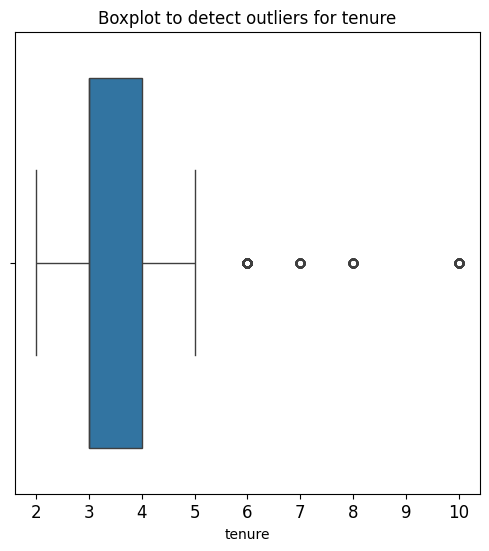

In [26]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

Ce Schéma nous montre qu'il y à des valeurs abérrantes dans `tenure`

In [ ]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


On va essayer de voir le pourcentage d'employés qui quittent l'entreprise

In [29]:
# Get numbers of people who left vs. stayed

print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


On remarque que 16 % des employés quittent l'entreprise

### Visualisation des données

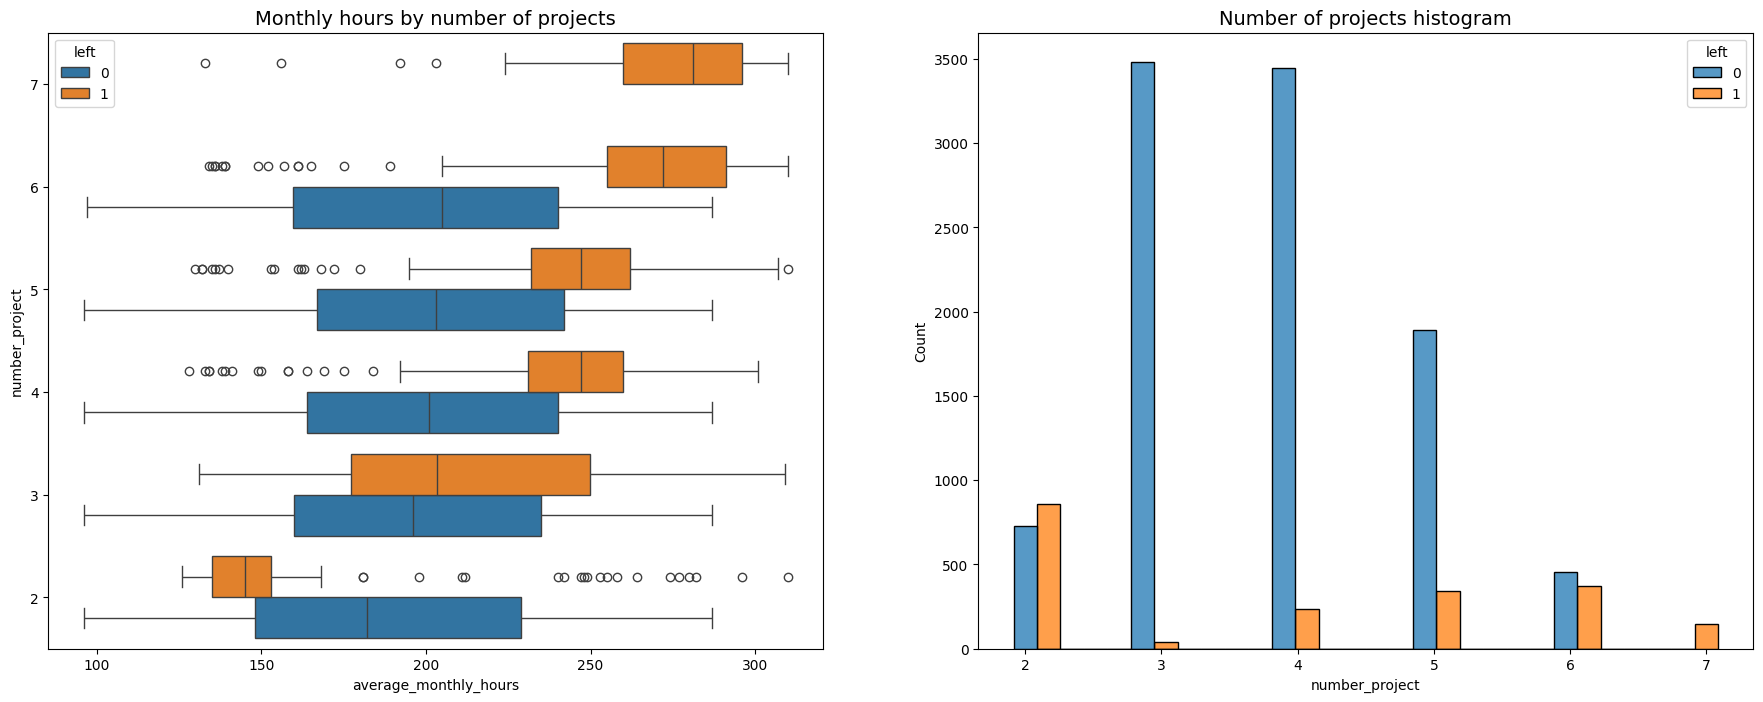

In [30]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

1. Diagramme en boîte (Boxplot) : "Monthly hours by number of projects"


Ce graphique montre la distribution des heures de travail mensuelles moyennes pour différents nombres de projets, en distinguant ceux qui sont partis (left = 1, en orange) et ceux qui sont restés (left = 0, en bleu).

Observations :
Faible nombre de projets (2-3) :

Les employés ayant 2 projets ont un faible nombre d'heures de travail mensuelles et un taux de départ relativement faible, mais il existe quelques cas où les employés ont quitté l'entreprise.
Ceux ayant 3 projets montrent une augmentation du taux de départ (plus d’orange visible), ce qui pourrait indiquer une surcharge de travail ou un mécontentement.
Nombre de projets intermédiaire (4-5) :

Les employés avec 4 et 5 projets travaillent plus d’heures en moyenne et ont une proportion importante de départs (plus d’orange).
Cela suggère qu’un nombre modéré de projets pourrait être un facteur contribuant au turnover.
Nombre élevé de projets (6-7) :

Les employés ayant 6 ou 7 projets travaillent de longues heures et montrent un taux de départ élevé.
Ceux avec 7 projets ont presque exclusivement quitté l’entreprise, ce qui signifie probablement une surcharge de travail insoutenable.
Interprétation :
Un excès de travail (nombre élevé de projets et d'heures travaillées) est un facteur de turnover.
Un très faible nombre de projets semble également associé à des départs, ce qui peut suggérer un manque de challenge ou de reconnaissance.



2. Histogramme : "Number of projects histogram"
Ce graphique montre la distribution du nombre de projets en fonction du statut de départ des employés.

Observations :
Les employés ayant 3 ou 4 projets sont majoritairement restés (bleu dominant).
Le taux de départ augmente pour les employés ayant 2, 6 ou 7 projets (plus d’orange).
La majorité des employés se concentrent autour de 3 à 5 projets, avec un pic clair à 3 et 4 projets.
Le taux de départ est élevé pour 2 projets (sous-engagement) et 6-7 projets (surcharge de travail).
Interprétation :
Un nombre modéré de projets (3 à 5) semble être la zone de stabilité.
Trop peu ou trop de projets peut conduire à une insatisfaction et à une augmentation du turnover.
L’entreprise pourrait bénéficier d’une meilleure répartition du travail pour éviter que des employés aient trop ou trop peu de projets.


Conclusions générales
Les employés ayant un nombre excessif de projets (6-7) ont un risque de turnover très élevé.
→ Action : Limiter la charge de travail excessive et équilibrer la répartition des projets.

Un nombre trop faible de projets (2) peut également conduire au départ.
→ Action : Identifier si ces employés manquent de motivation, de reconnaissance ou d’opportunités de croissance.

Les employés ayant 3 à 5 projets semblent être les plus stables.
→ Action : Trouver un équilibre optimal entre charge de travail et satisfaction.

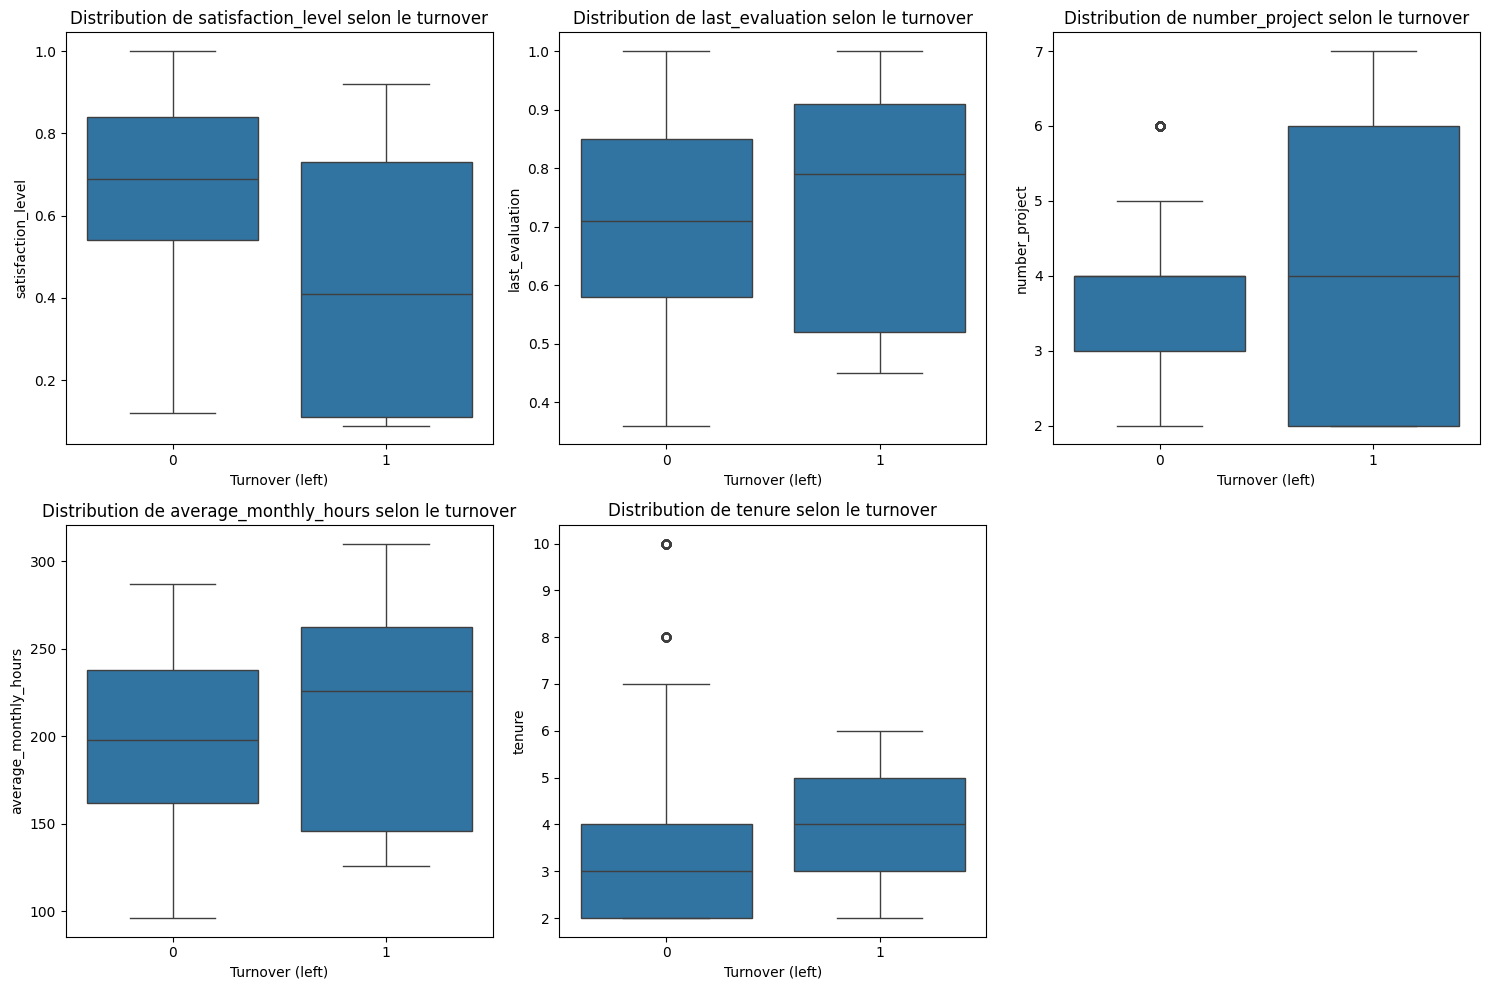

In [33]:
plt.figure(figsize=(15, 10))

# Liste des variables à analyser avec des boxplots
variables = ['satisfaction_level', 'last_evaluation', 'number_project',
             'average_monthly_hours', 'tenure']

# Création des boxplots pour chaque variable en fonction de "left"
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df1['left'], y=df1[var])
    plt.title(f"Distribution de {var} selon le turnover")
    plt.xlabel("Turnover (left)")
    plt.ylabel(var)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


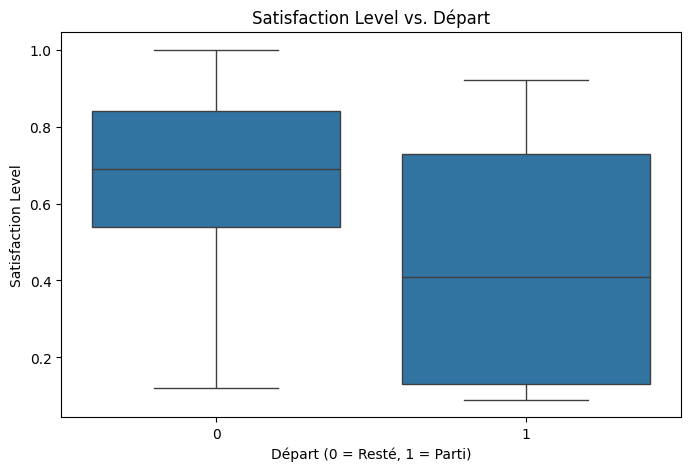

In [37]:
# Create a plot as needed
### YOUR CODE HERE ###

# 🔹 1. Satisfaction Level vs. Départ (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x="left", y="satisfaction_level", data=df0)
plt.title("Satisfaction Level vs. Départ")
plt.xlabel("Départ (0 = Resté, 1 = Parti)")
plt.ylabel("Satisfaction Level")
plt.show()




1. Satisfaction Level vs Turnover (Boxplot)
Observations :
Les employés qui restent ont un niveau de satisfaction moyen très élevé (près de 0.8).
Ceux qui partent ont un niveau de satisfaction beaucoup plus faible, souvent inférieur à 0.5.
Conclusion :
Un faible niveau de satisfaction est un facteur majeur de départ.
Il est crucial d’améliorer la satisfaction des employés pour réduire le turnover.

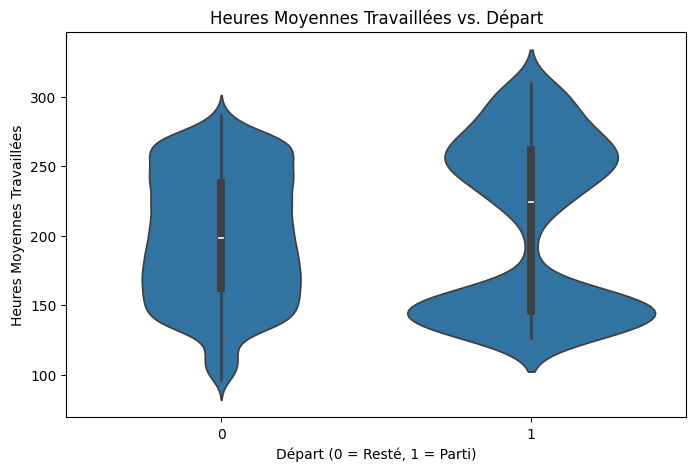

In [38]:
# 🔹 2. Heures Moyennes vs. Départ (Violin Plot)
plt.figure(figsize=(8,5))
sns.violinplot(x="left", y="average_monthly_hours", data=df0)
plt.title("Heures Moyennes Travaillées vs. Départ")
plt.xlabel("Départ (0 = Resté, 1 = Parti)")
plt.ylabel("Heures Moyennes Travaillées")
plt.show()


2. Heures Moyennes Travaillées vs Turnover (Violin Plot)
Observations :
Ceux qui restent ont un nombre d’heures de travail plus modéré, généralement autour de 150 à 250 heures par mois.
Ceux qui partent ont une distribution des heures de travail plus large, avec des pics à des heures extrêmes (très faibles ou très élevées).
Conclusion :
Les employés qui travaillent trop ou trop peu d’heures semblent être plus susceptibles de partir.
La gestion de la charge de travail (éviter les heures extrêmes) pourrait améliorer la rétention.

C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\3458426663.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="number_project", y="left", data=df0, ci=None)


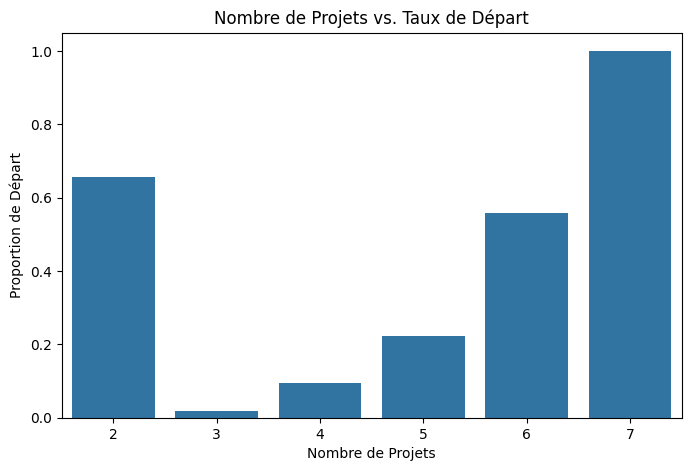

In [39]:

# 🔹 3. Nombre de Projets vs. Départ (Barplot)
plt.figure(figsize=(8,5))
sns.barplot(x="number_project", y="left", data=df0, ci=None)
plt.title("Nombre de Projets vs. Taux de Départ")
plt.xlabel("Nombre de Projets")
plt.ylabel("Proportion de Départ")
plt.show()


3. Nombre de Projets vs Turnover (Barplot)
Observations :

Les employés ayant 2 projets ont un taux de départ élevé, tandis que ceux avec 3 ou 4 projets ont un taux de départ relativement faible.
Les employés avec 6 ou 7 projets ont également un taux de départ élevé.
Conclusion :

Un nombre de projets trop faible ou trop élevé semble être associé à un taux de départ plus élevé.
Il est essentiel d’équilibrer la charge de travail avec un nombre modéré de projets (environ 3 à 5 projets).

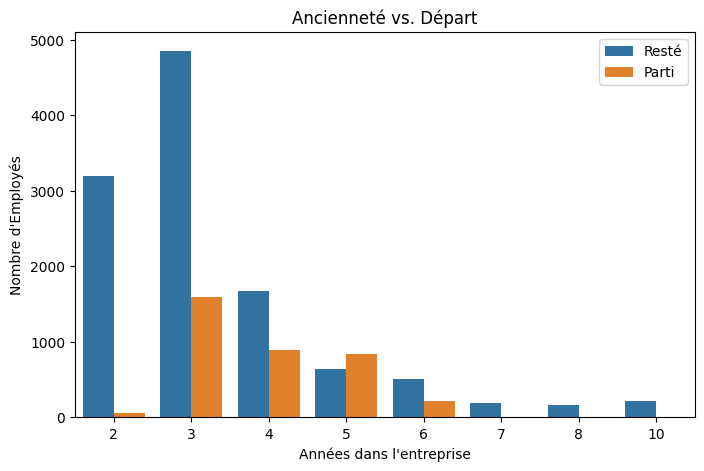

In [40]:

# 🔹 4. Ancienneté (Time Spent) vs. Départ (Countplot)
plt.figure(figsize=(8,5))
sns.countplot(x="tenure", hue="left", data=df0)
plt.title("Ancienneté vs. Départ")
plt.xlabel("Années dans l'entreprise")
plt.ylabel("Nombre d'Employés")
plt.legend(["Resté", "Parti"])
plt.show()


4. Ancienneté vs Turnover (Barplot)
Observations :

Le taux de départ est plus élevé chez les employés ayant moins de 3 ans d'ancienneté, avec un pic entre 2 et 3 ans.
Les employés ayant plus de 3 ans d’ancienneté montrent un taux de départ plus faible.
Conclusion :

Les nouveaux employés (moins de 3 ans) sont plus susceptibles de partir, suggérant un besoin d’améliorer l’intégration et la gestion des premiers mois.
Une meilleure intégration et suivi des nouveaux employés pourrait améliorer la rétention.

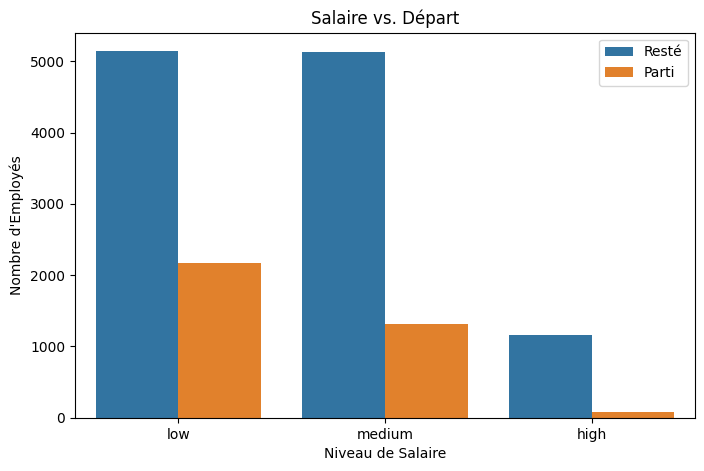

In [41]:

# 🔹 5. Salaire vs. Départ (Countplot)
plt.figure(figsize=(8,5))
sns.countplot(x="salary", hue="left", data=df0, order=["low", "medium", "high"])
plt.title("Salaire vs. Départ")
plt.xlabel("Niveau de Salaire")
plt.ylabel("Nombre d'Employés")
plt.legend(["Resté", "Parti"])
plt.show()

5. Salaire vs Turnover (Barplot)
Observations :
Les employés avec un salaire bas (low) ont un taux de départ beaucoup plus élevé que ceux avec un salaire moyen ou élevé.
Conclusion :
Le salaire a un impact important sur la fidélisation des employés. Les employés mal rémunérés sont plus susceptibles de partir.
Il peut être pertinent de réévaluer les salaires pour les employés dans les catégories de salaire faible afin d'améliorer la rétention.

Confirmons que les employés avec 7 projets quittent bien l'entreprise

In [42]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Ceci confirme que tous les employés ayant 7 projets sont parti

Examinons les heures mensuelles moyennes par rapport aux niveaux de satisfaction.

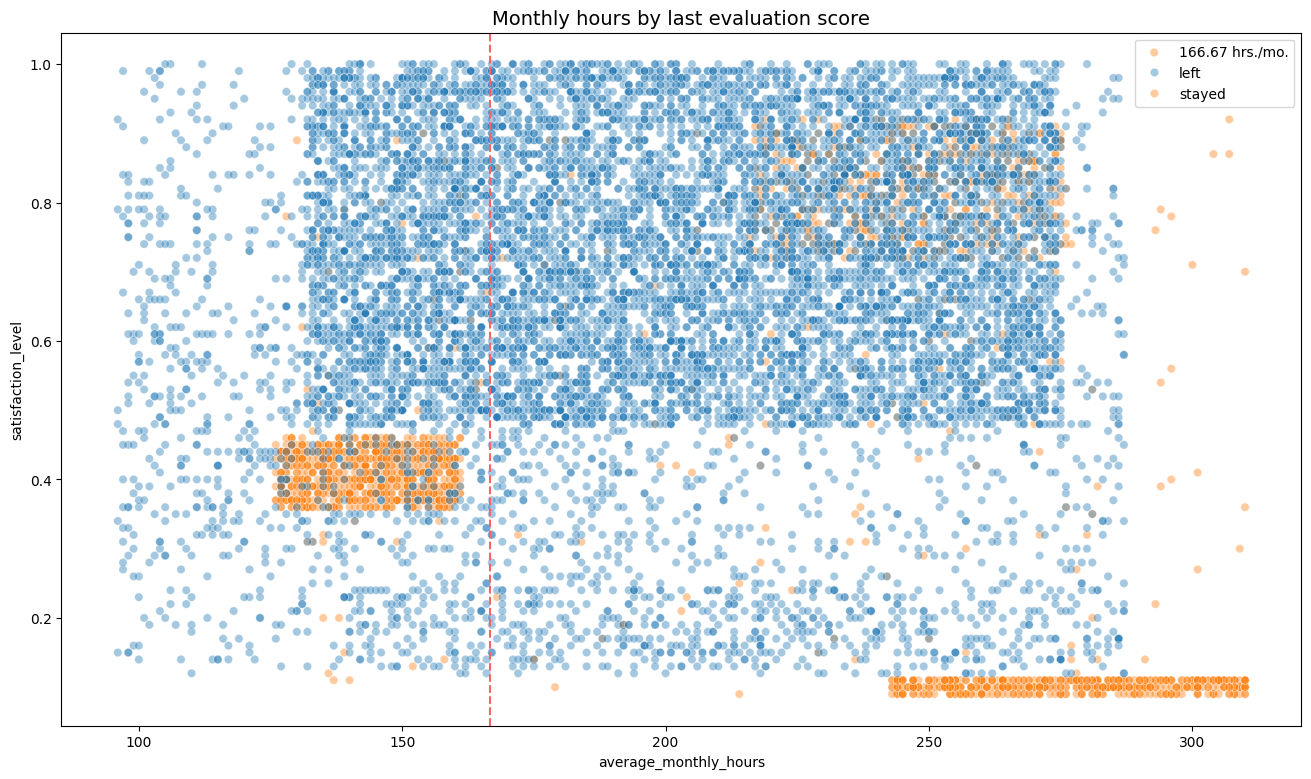

In [43]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

Insights du graphique "Monthly Hours by Last Evaluation Score"
Ce graphique est un scatter plot qui représente la relation entre :

L'axe X : Le nombre moyen d'heures travaillées par mois (average_monthly_hours).
L'axe Y : Le niveau de satisfaction (satisfaction_level).
Les couleurs :
Orange = Employés qui ont quitté (left=1).
Bleu = Employés qui sont restés (left=0).
Ligne rouge verticale = Référence des 166,67 heures par mois (équivalent à 40 heures/semaine).
1. Deux groupes majeurs d’employés ayant quitté (orange)
Observation 1 : Un groupe à faible satisfaction (~0.4) et peu d'heures travaillées (~120-150h)
Ces employés travaillent moins que la moyenne et ont une satisfaction très faible.
Ils se situent bien en dessous de la ligne rouge (166.67h/mois).
Interprétation :

Ces employés ont probablement été licenciés ou mis à l'écart.
Il peut s'agir d’un manque d’engagement, de mauvaise performance ou d’une insatisfaction générale.
L’entreprise devrait analyser si ces employés avaient des opportunités de progression ou un bon encadrement.
Observation 2 : Un autre groupe avec une très forte charge de travail (250-300h/mois)
Ces employés travaillaient bien au-delà de la norme, dépassant 250 heures/mois.
Leur satisfaction est extrêmement basse (~0.1-0.2).
Interprétation :

Ces employés ont probablement démissionné suite à une surcharge de travail.
Un épuisement professionnel (burnout) est une cause évidente.
Solution : L’entreprise doit revoir la répartition des charges et surveiller les heures supplémentaires.
2. Les employés restés ont un éventail plus large de satisfaction
Les employés en bleu (left=0) sont bien répartis sur toute l’échelle de satisfaction.
Cela montre que certains restent malgré une faible satisfaction, peut-être à cause de la stabilité financière ou d’un manque d’alternatives.
Interprétation :

La satisfaction seule n’est pas suffisante pour expliquer le turnover.
Il faut la croiser avec d’autres variables comme la promotion, le salaire et la charge de travail.
3. La majorité des employés travaillent entre 150 et 250 heures
La densité de points bleus est concentrée entre 150h et 250h.
Cela signifie que la plupart des employés restent quand leur charge de travail est raisonnable.
Interprétation :

Un bon équilibre semble être entre 150h et 220h/mois.
L’entreprise peut fixer un seuil critique (ex. : au-dessus de 250h, risque accru de départ).
4. La ligne rouge (166.67h) sert de référence pour la "norme"
Une grande partie des employés restent autour de cette valeur.
Les employés qui quittent sont soit sous-chargés (<150h), soit surchargés (>250h).
Interprétation :

La sous-charge (moins de 150h) et la surcharge (plus de 250h) sont les deux extrêmes à éviter.
L’entreprise doit surveiller les écarts et s’assurer que les employés ne tombent pas dans ces catégories.

### Analyse des graphiques : Satisfaction et Ancienneté (Tenure)

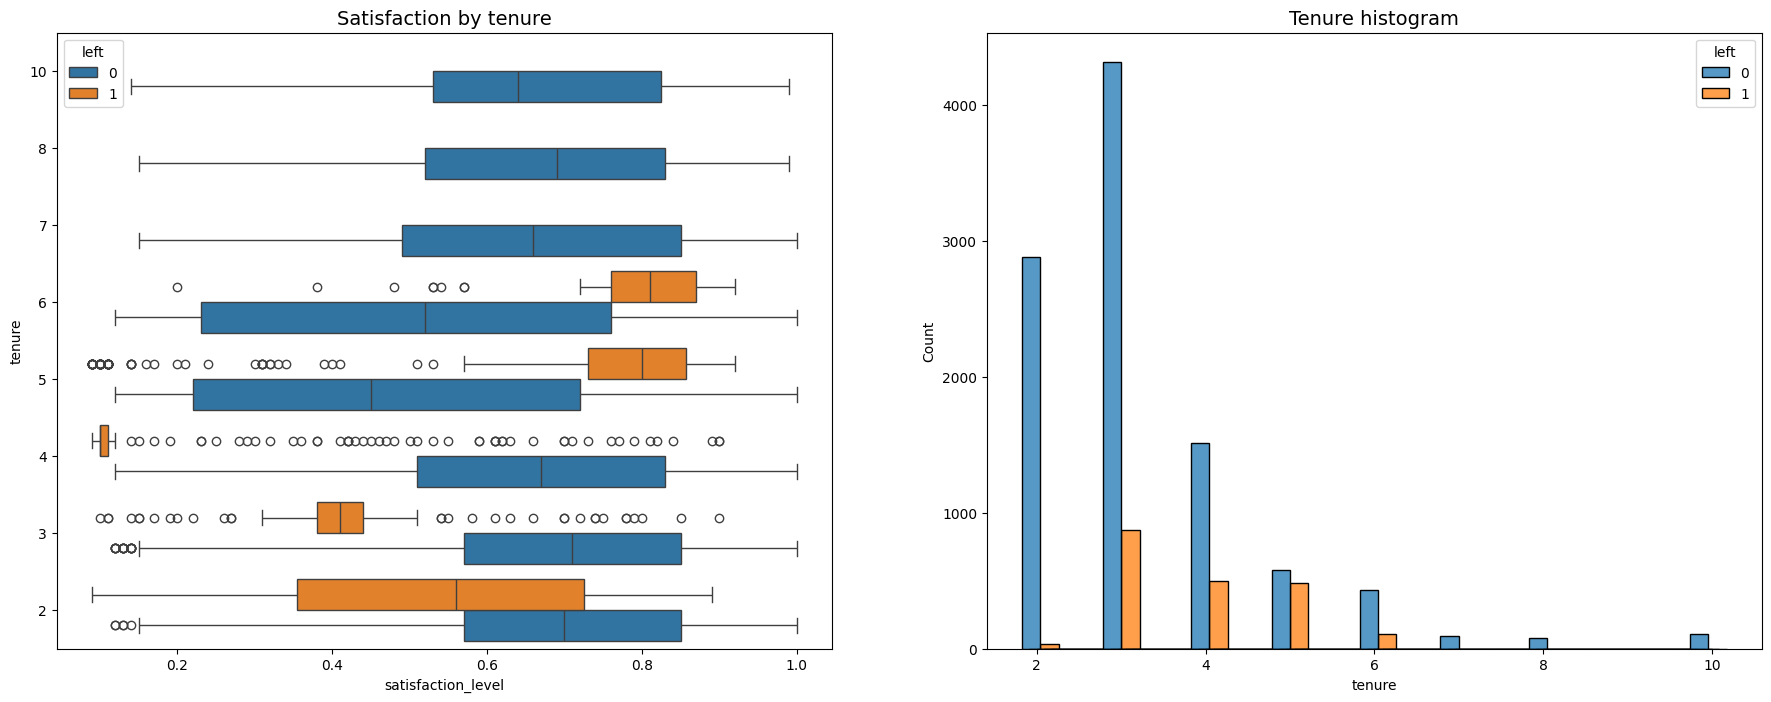

In [44]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

1. Satisfaction par ancienneté (Boxplot, gauche)
Observations :

Les employés avec 2 ans d’ancienneté ont une faible satisfaction et un taux de départ élevé (left=1 en orange).
Ceux avec 3 ans montrent également un taux de départ significatif.
À partir de 5 ans, les employés qui restent (left=0 en bleu) ont une satisfaction plus variée, mais le turnover diminue.
Les employés avec 6 ans d’ancienneté qui quittent ont une satisfaction modérée (~0.6), ce qui peut indiquer un désintérêt ou une absence de perspectives d’évolution.
Interprétation :

Les employés avec 2-3 ans d'ancienneté sont les plus à risque de quitter.
La satisfaction joue un rôle clé : les employés insatisfaits partent plus vite, surtout au début de leur carrière.
Après 6 ans, le turnover est plus faible, ce qui signifie que les employés qui restent ont probablement trouvé une stabilité.

2. Histogramme de l'ancienneté (Droite)
Observations :

Le plus grand nombre d'employés ont entre 2 et 4 ans d'ancienneté.
Le turnover est particulièrement élevé à 3 ans, suivi de 2 et 4 ans.
Après 6 ans, le turnover devient très faible.
Interprétation :

Les employés quittent principalement après 2-3 ans, probablement à cause du manque d’évolution de carrière ou d’augmentation de salaire.
Ceux qui restent au-delà de 6 ans sont moins susceptibles de partir.
L’entreprise doit se concentrer sur la fidélisation des employés autour de 2-4 ans en offrant des opportunités de promotion et d’augmentation de salaire.


Calculons les scores de satisfaction moyens et médians des employés qui sont partis et de ceux qui ne l’ont pas fait.

In [45]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\1074052523.py:2: FutureWarning: The provided callable <function mean at 0x000001AEFF224940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\1074052523.py:2: FutureWarning: The provided callable <function median at 0x000001AEFF37DC60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Comme prévu, les scores de satisfaction moyens et médians des employés qui ont quitté l'entreprise sont inférieurs à ceux des employés qui sont restés. Il est intéressant de noter que parmi les employés qui sont restés, le score de satisfaction moyen semble être légèrement inférieur au score médian. Cela indique que les niveaux de satisfaction parmi ceux qui sont restés pourraient être biaisés vers la gauche.

Examinons les niveaux de salaire pour différentes périodes d'ancienneté.

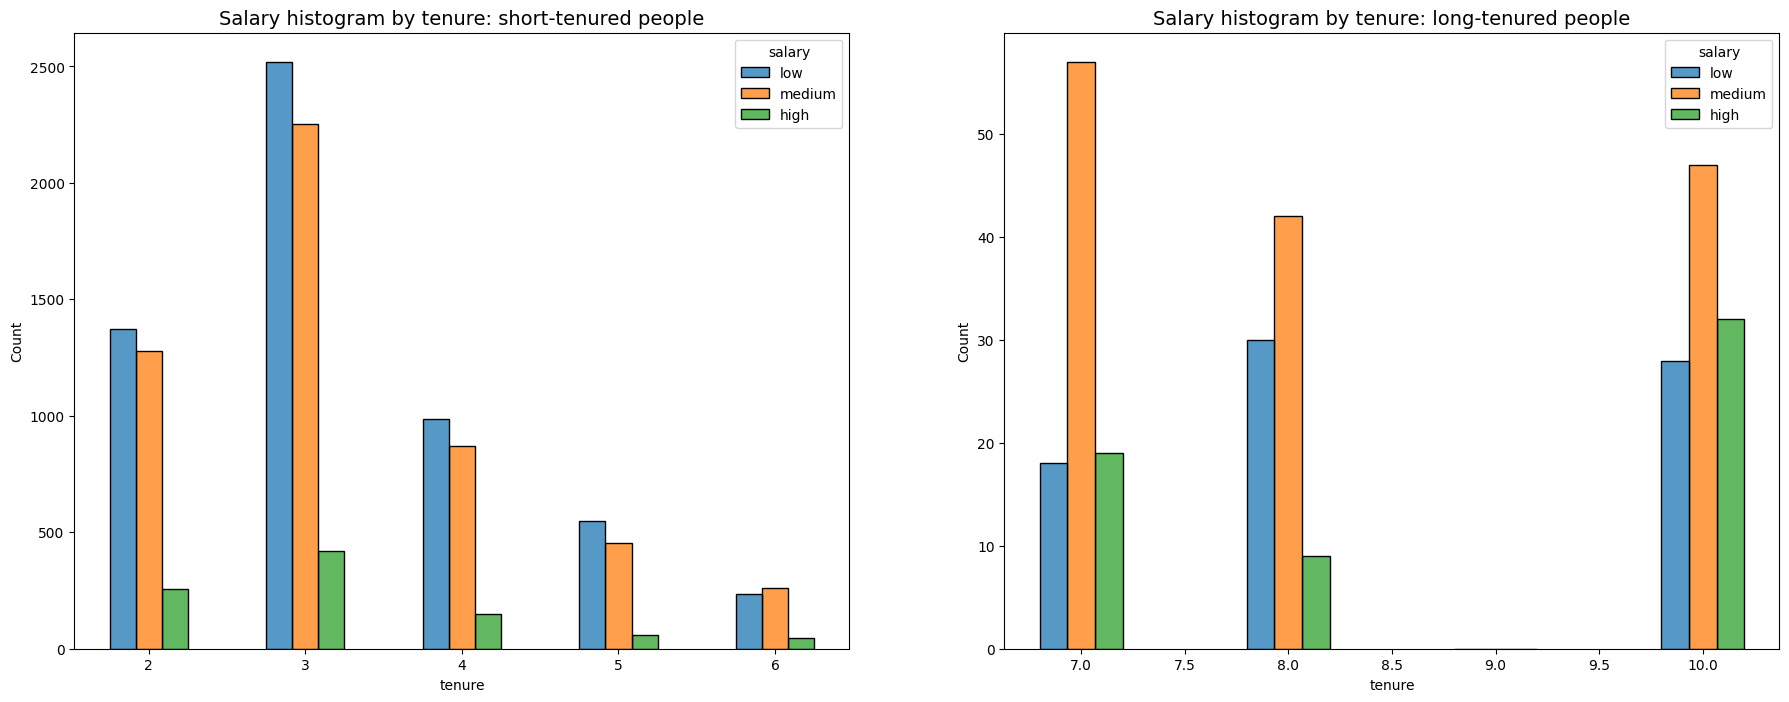

In [46]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');